<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap08a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EMアルゴリズムの例題

2つのクラスタからなるランダムなデータを生成し、EMアルゴリズムによって分布のパラメータを求めよ。


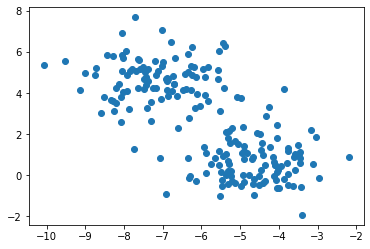

In [90]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=12)
plt.scatter(X[:, 0], X[:, 1])

In [58]:
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X)

GaussianMixture(n_components=2)

# 練習問題

上記「EMアルゴリズムの例題」で用いたデータに対して、GaussianMixtureによって求めた2つの分布を2クラスの分布と解釈して、クラス境界を描画せよ。

# 解答例

clfインスタンスの属性から2つの分布のパラメータを得て、例題8.1と同じ手順で描画します。

In [59]:
clf.means_

array([[-4.6618308 ,  0.60698657],
       [-7.10718231,  4.63880267]])

In [60]:
clf.covariances_

array([[[ 0.88832338,  0.01894626],
        [ 0.01894626,  0.87822621]],

       [[ 1.16958954, -0.07856041],
        [-0.07856041,  1.06482599]]])

In [61]:
m1 = clf.means_[0]
m2 = clf.means_[1]
c1 = clf.covariances_[0]
c2 = clf.covariances_[1]

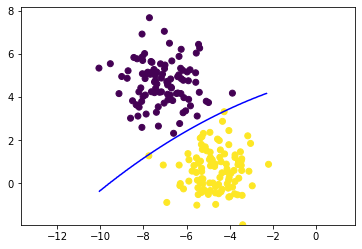

In [63]:
from scipy.stats import multivariate_normal
f = lambda x: multivariate_normal.pdf(x, mean=m1, cov=c1) - multivariate_normal.pdf(x, mean=m2, cov=c2)

x1 = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.1)
x2 = np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.1)
X1, X2 = np.meshgrid(x1, x2)

Z = f(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.axis('equal')
plt.contour(X1, X2, Z, levels=0, colors="blue")
plt.show()